# XorNet

This notebook trains a two dimensional, single hidden layer perceptron to learn the `XOR`
operator. Specifically, this model follows the description outlined in Chapter 6.2 in
`The Deep Learning Book` by Goodfellow, et al:

$$
f(X) = \vec w \cdot ReLU(WX + \vec c) + \vec b
$$

The model is treated as a regression, and optimizes mean squared error using stochastic
gradient descent. While it is possible for the model to converge on a global optimum
and perfectly solve `XOR` ([cell 5](#success)), it is stochastic and often gets stuck in a local
minima ([cell 7](#failure)).

The model and the training loop are defined in the python file [net.py](net.py), but is
trained here for visualization and reproduction purposes

In [1]:
from net import XorNet
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [2]:
model = XorNet(rate=1e-1)
print(model)

XorNet(
  (mlp): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
  (loss): MSELoss()
)


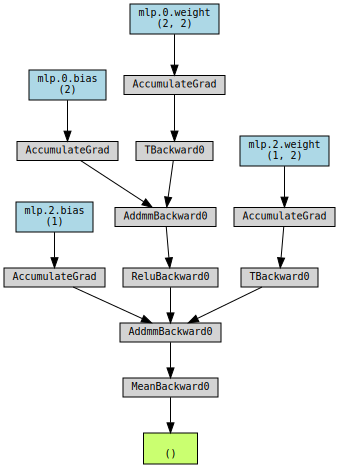

In [3]:
model.draw_network()

In [4]:
class XorDataset(Dataset):
    def __init__(self):
        self.X = torch.tensor([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0]])
        self.y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx, :], self.y[idx, :]

<!-- <a id='success_id'></a> -->
### Success

The model converges to global minima and completely solves `XOR`

In [5]:
np.random.seed(69)
torch.manual_seed(69)
dataset = XorDataset()
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)
model.to(model.get_device())
model.fit(data_loader, n_epochs=2000)

Loss: 0.264483 [    1/ 2000]
Loss: 0.000939 [  201/ 2000]
Loss: 0.000000 [  401/ 2000]
Loss: 0.000000 [  601/ 2000]
Loss: 0.000000 [  801/ 2000]
Loss: 0.000000 [ 1001/ 2000]
Loss: 0.000000 [ 1201/ 2000]
Loss: 0.000000 [ 1401/ 2000]
Loss: 0.000000 [ 1601/ 2000]
Loss: 0.000000 [ 1801/ 2000]
Loss: 0.000000 [ 2000/ 2000]


In [6]:
model(dataset.X.to(model.get_device())).round()

tensor([[0.],
        [1.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

<a id='failure_id'></a>
### Failure
A different model with identical hyperparameters and training data fails to effectively
learn `XOR`

In [7]:
np.random.seed(0)
torch.manual_seed(0)
new_model = XorNet(rate=1e-1)
new_model.to(model.get_device())
new_model.fit(data_loader, n_epochs=2000)

Loss: 0.567021 [    1/ 2000]
Loss: 0.188284 [  201/ 2000]
Loss: 0.166667 [  401/ 2000]
Loss: 0.166667 [  601/ 2000]
Loss: 0.166667 [  801/ 2000]
Loss: 0.166667 [ 1001/ 2000]
Loss: 0.166667 [ 1201/ 2000]
Loss: 0.166667 [ 1401/ 2000]
Loss: 0.166667 [ 1601/ 2000]
Loss: 0.166667 [ 1801/ 2000]
Loss: 0.166667 [ 2000/ 2000]


In [8]:
new_model(dataset.X.to(model.get_device())).round()

tensor([[0.],
        [0.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)